# **Análisis exploratorio y estadística**
# AE04 - Introducción a la Regresión Lineal - Parte 1

El contenido de esta clase corresponde a la implementación utilizando Python + Numpy para generar regresión lineal simple, y regresión lineal múltiple. La idea es poder entender y traspasar el proceso de una notación matemática, a operaciones de código utilizando numpy. Finalmente, enseñar el uso de librerías y comprobar que nuestras implementaciones *from scratch*, obtienen resultados similares a las implementaciones estándar de las librerías. 

En primer lugar, importamos las librerías:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline


Para ilustrar el cómo podemos ajustar una regresión lineal simple, vamos a simular datos aleatorios. Vamos a generar una variable independiente `x`, con valores del 1 al 10, y nuestra variable dependiente `y` corresponderá a una combinación de números enteros obtenidos de forma aleatoria entre $[10,20]$, con nuestra variable $x$.

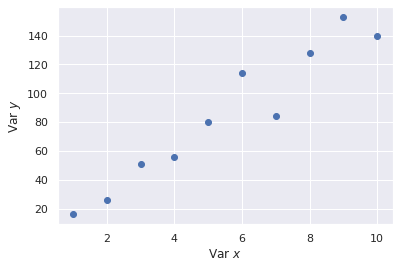

In [ ]:
np.random.seed(42) #Fijamos la semilla aleatoria

x = np.arange(1,11) # Generamos 10 numeros desde el 1 al 10
# Generamos 10 numeros aleatorios entre 10 y 20, 
# luego lo multiplicamos con nuestra variable x
y = np.random.randint(10, 20, size=10) * x 

plt.scatter(x,y) # Grafiquemos como se ven nuestros datos.
plt.xlabel("Var $x$")
plt.ylabel("Var $y$")
plt.show()

La idea de la regresión lineal es poder modelar la dependencia de las variables independientes, con las variables dependientes. En este caso, nosotros explícitamente hemos generado esta dependencia de $y$ en función de $x$, pero en set de datos de la vida real, esta dependencia puede ser mucho más complicada de modelar. La forma de una regresión lineal simple corresponde a la siguiente ecuación: 

$$Y = \beta_1 X + \beta_0 + \epsilon$$

donde $Y$ corresponde a nuestra variable dependiente, $X$ a nuestra variable independiente, $\beta_1$ al coeficiente de regresión el cual modela la relación de la variable $X$ con la variable $Y$, finalmente $\beta_0$ corresponde al intercepto y $\epsilon$ corresponde a un proceso aleatorio inherente a los datos. 

En este caso, nosotros podemos aproximar los valores de $Y$, y los parámetros del modelo ($\beta_1$ y $\beta_0$). Por lo mismo, utilizaremos la notación $\hat{Y}, \hat{\beta_1}, \hat{\beta_0}$ para referirnos a estas aproximaciones. Utilizando el **método de los mínimos cuadrados** podemos estimar los valores de los distintos parámetros:


- Primer paso, calcular $\hat{\beta_1}$

$$\hat{\beta_1} = \frac{(\sum x \sum y) - (n\sum xy)}{(\sum x)^2 - n\sum x^2} =\frac{\sum(x - \bar{x})(y - \bar{y})}{\sum(x - \bar{x})^2}$$

- Segundo paso, calcular $\hat{\beta_0}$ en función de $\hat{\beta_1}$

$$\hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n} = \bar{y} - \hat{\beta_1}\bar{x}$$

Vamos a utilizar la segunda parte de las fórmulas, utilizando una combinación de las funciones de suma y de obtener el promedio (`np.sum` y `np.mean`). En este caso vamos a transformar las sumatorias ($\Sigma$) en `np.sum`, los promedios ($\bar{x}$) en `np.mean`, y $n$ en `len(x)`. Cabe destacar que realizar las operaciones del tipo: $x - \bar{x}$, se pueden realizar debido a que $x$ es un vector de numpy, y este permite operaciones entre vectores y escalares.



In [ ]:
x_min_mx = x - np.mean(x)  # x minus mean(x)
y_min_my = y - np.mean(y)  # y minus mean(y)

beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
beta_0 = np.mean(y) - (beta_1 * np.mean(x))

print(f'beta_1: {beta_1:5.2f} \nbeta_0: {beta_0:5.2f}')

beta_1: 15.20 
beta_0:  1.20


## <font color='green'>**Actividad 1**</font>

Implementar la primera forma de cada uno de los parámetros:

$$ \hat{\beta_1} = \frac{(\sum x \sum y) - (n\sum xy)}{(\sum x)^2 - n\sum x^2}$$ 
y
$$ \hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n}$$

- Compruebe que los valores de obtenidos con la primera forma y la segunda forma son iguales
- ¿Qué pasaría con nuestros coeficientes si cambiamos la forma de generar nuestra variable dependiente $Y$? Fije una semilla y reemplace el operador utilizado (en vez de multiplicar por $x$, cambiar por ej: suma)


In [ ]:
# Su codigo aqui ...

beta_1b = ( np.sum(x)*np.sum(y) - len(x)*np.sum(x*y) )/(np.sum(x)**2 - len(x)*np.sum(x**2)) 

beta_0b = ( np.sum(y) - beta_1*np.sum(x) )/len(x)

print(f'Primera forma:\n beta_1: {beta_1:5.2f} \n beta_0: {beta_0:5.2f}')
print(f'Segunda forma:\n beta_1: {beta_1b:5.2f} \n beta_0: {beta_0b:5.2f}')


Primera forma:
 beta_1: 15.20 
 beta_0:  1.20
Segunda forma:
 beta_1: 15.20 
 beta_0:  1.20


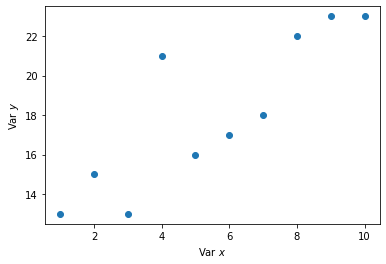

In [ ]:
# ¿Qué pasaría con nuestros coeficientes si cambiamos la forma de generar nuestra variable dependiente  Y ? 
# Fije una semilla y reemplace el operador utilizado (en vez de multiplicar por  x , cambiar por ej: suma)

np.random.seed(24) #Fijamos la semilla aleatoria

x = np.arange(1,11) # Generamos 10 numeros desde el 1 al 10
# Generamos 10 numeros aleatorios entre 10 y 20, 
# luego lo multiplicamos con nuestra variable x
y = np.random.randint(10, 20, size=10) + x #sumanos los valores aleatorizados

plt.scatter(x,y) # Grafiquemos como se ven nuestros datos.
plt.xlabel("Var $x$")
plt.ylabel("Var $y$")
plt.show()

In [ ]:
x_min_mx = x - np.mean(x)  # x minus mean(x)
y_min_my = y - np.mean(y)  # y minus mean(y)

beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
beta_0 = np.mean(y) - (beta_1 * np.mean(x))

print(f'beta_1: {beta_1:5.2f} \nbeta_0: {beta_0:5.2f}')
print()
print('''Incluyendo el operador suma para aleatorizar los valores, se observa una valor de intercepto es mayor que cuando se multiplica, es decir,
 cuando se suma se esta movilizando el recta hacia arriba''')

beta_1:  1.11 
beta_0: 12.00

Incluyendo el operador suma para aleatorizar los valores, se observa una valor de intercepto es mayor que cuando se multiplica, es decir,
 cuando se suma se esta movilizando el recta hacia arriba


<font color='green'>Fin Actividad 1</font>

Con los parámetros $\hat{\beta_1}$ y $\hat{\beta_0}$, podemos generar una función la cual reciba el valor el vector $x$, y realizar la estimación de $\hat{Y}$:

In [ ]:
# Llamaremos a esta función, lin_reg(x), recibe el vector y utiliza las variables betas calculadas anteriormente
# Una posible mejora, es que reciba los betas por parámetros de la función
def lin_reg(x): 
    y_hat = (beta_1 * x) + beta_0 #Aplicamos la forma de la regresión lineal 
    return y_hat

Con esta función definida, podemos graficar nuestra recta obtenida utilizando la función `lin_reg`

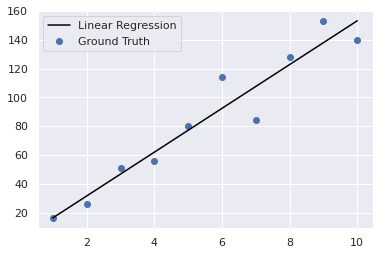

In [ ]:
plt.scatter(x,y,label="Ground Truth") # Vamos a gráficar nuestros datos originales 
plt.plot(x,lin_reg(x), color="black", label="Linear Regression") #Luego graficamos la curva ajustada 

plt.legend()
plt.show()

Podemos ver que nuestra regresión es bastante cercana a los valores reales utilizados para ajustar la regresión. Nosotros podemos calcular la bondad de ajuste de nuestra regresión, mediante el análisis de los errores. El error se define como: $y_i - \hat{y_i}$ y corresponde a la resta del valor real $i$-ésimo, con el valor ajustado $i$-ésimo.

Utilizando Numpy, este cálculo es relativamente sencillo, para mostrar el paso a paso, vamos a tener los valores del vector $y$:


In [ ]:
print(y)

[ 16  26  51  56  80 114  84 128 153 140]


Por otra parte, vamos a tener los valores del vector $\hat{y}$:

In [ ]:
print(lin_reg(x))

[ 16.4  31.6  46.8  62.   77.2  92.4 107.6 122.8 138.  153.2]


Luego, los errores $e$, se obtienen simplemente con la resta entre estos dos elementos

In [ ]:
e = y - lin_reg(x)
print(e)

[ -0.4  -5.6   4.2  -6.    2.8  21.6 -23.6   5.2  15.  -13.2]


Estos errores, podemos graficarlos utilizando el método de matplotlib `vlines` (Vertical Lines). Este método recibe como mínimo 3 parámetros: `x` (los valores en el eje X), `y_min` el inicio de la línea vertical, `y_max` el final de la línea vertical. En este caso, `y_min` va a corresponder a los valores reales $y$, e `y_max` corresponderán a los valores ajustados $\hat{y}$.

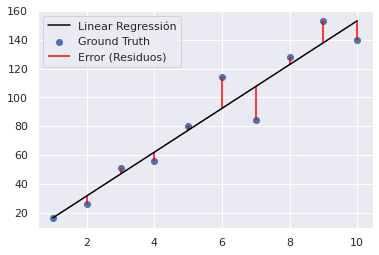

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x,lin_reg(x), color="black", label="Linear Regressión") 
ax.scatter(x,y, label="Ground Truth")

ax.vlines(x, y, lin_reg(x), color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto. 

plt.legend()
plt.show()

Como anteriormente lo dijimos, la regresión se ajusta bastante bien a los datos simulados. Por lo mismo, ahora vamos a cuantificar qué tan bien se ajusta la regresión. Para esto, vamos a calcular el $R^2$, en función de la __Suma Total de los Cuadrados__, $SST$) y la __Suma de los Errores Cuadrados__, ($SSE$). 

El $SST$ obtiene su nombre de su sigla en inglés **Sum of Squares Total**, y esta mide la variabilidad total dentro del set de datos (específicamente dentro de nuestra variable dependiente). Esta se calcula como:

$$ SST = \sum_i (y_i - \bar{y})^2$$

Por otra parte, el $SSE$ obtiene su nombre de su sigla en inglés **Sum of Squares Error**, y mide la diferencia total entre los valores reales (u observados) y los valores ajustados (o predichos). Esta se cacula como:

$$ SSE = \sum_i (y_i - \hat{y})^2 = \sum_i e_i^2$$

Con estas dos métricas podemos calcular el __coeficiente de determinación__, $R^2$. Esto nos proporcionara una métrica que podemos utilizar para cuantificar cuanta variabilidad explican nuestro modelo de regresión. Esta se calcula de la siguiente forma utilizando las dos métricas mencionadas anteriormente.

$$ R^2 = 1 - \frac{SSE}{SST}$$

El $R^2$ puede resultar en valores entre $[0,1]$, donde si $R^2 = 1$, significa que la variable utilizada para la regresión lineal simple explica el 100% del comportamiento de la variable dependiente. Por el contrario, un $R^2 = 0$ significa que la variable independiente utilizada, no es capaz de explicar el comportamiento de la variable dependiente. 

Calculemos el $R^2$ para nuestros datos sintéticos:


In [ ]:
SST = np.sum((y - np.mean(y))**2) #Calculamos la suma total de los cuadrados
SSE = np.sum((y - lin_reg(x))**2) # Calculamos la suma de los errores cuadrados
R2 = 1 - (SSE / SST) # Computamos el R^2

print(f"El R^2 obtenido para nuestros datos sintéticos es de {R2:6.4f}")

El R^2 obtenido para nuestros datos sintéticos es de 0.9251


Con esto, podemos decir que nuestra regresión lineal simple, es capaz de explicar un $92.51\%$ de la variabilidad del comportamiento de nuestra variable dependiente sintética. Esto hace bastante sentido, ya que ese $7.49\%$ que no es capaz de explicar, principalmente se debe a la aleatoriedad que nosotros introdujimos en la variable dependiente (`np.random.randint(10, 20, size=10)`).

Otras métricas existentes para poder ver que tan buena es nuestra regresión, consisten en el análisis de los errores. Si nuestra regresión fuese perfecta, podríamos ver que el  $SSE = 0$, indicando claramente que nuestros valores predichos, son iguales a los valores observados. 

Estas métricas incluyen el __Error Cuadrático Medio__ (__Mean Squared error__, $MSE$), El __Error Absoluto Medio__ (__Mean Absolute Error__, $MAE$) y el __Error Absoluto Porcentual Promedio__ (__Mean Absolute Percentage Error__, $MAPE$). Idealmente, si utilizamos nuestra regresión para poder hacer pronósticos, nosotros queremos que los errores que podamos cometer sean mínimos (de lo contrario, sería una mala predicción). Estas métricas nos permiten evaluar el error de nuestros modelos, y por consiguiente decir si nuestra regresión podría utilizarse para realizar pronósticos.

Interpretaciónes que se les pueden dar a estas métricas son bastante directas: el $MAE$ nos dirá una magnitud promedio de los residuos, dando una vista general de como podría comportarse nuestra regresión. El $MAPE$ nos indicara porcentualmente, que tanto se aleja nuestros valores predichos, de los valores reales. Finalmente, el $MSE$ cumple una misma función que el $MAE$, pero como estamos usando el cuadrado de los errores, esta métrica nos indicara que tan bueno es nuestro modelo, con respecto a valores atípicos (el error va a aumentar considerablemente para puntos alejados de nuestra regresión). Esto lo podrían visualizar en el gráfico de los errores visto anteriormente.

Las fórmulas para cada una de estas métricas son: 

$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2$$

$$ MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y_i}|$$

$$ MAPE = \frac{1}{n} \sum_{i=1}^n |\frac{y_i - \hat{y_i}}{y_i}|$$

**Nota:**, MAPE se indefine para valores de $y_i = 0$, por lo mismo, no es una métrica comúnmente utilizada.


Utilizando `numpy` podemos computarlas:


In [ ]:
mse = np.sum((y - lin_reg(x))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg(x))) / len(y)
mape = np.sum(np.abs((y - lin_reg(x))/y)) / len(y)

Luego, simplemente las imprimimos y vemos que si bien, el $MAE$ y el $MAPE$ son bajos, los puntos {6, 7, 9, 10} de los datos, influyen considerablemente en el $MSE$

In [ ]:
print(f'MSE = {mse:6.2f}\nMAE = {mae:6.2f}\nMAPE = {mape:5.2f}')

MSE = 154.28
MAE =   9.76
MAPE =  0.12


Alternativamente, podemos utilizar la librería de `scikit-learn` para poder usar sus implementaciones del $MSE$, $MAE$ y el $R^2$ (el $MAPE$ no está implementado en esta librería). Cada uno de estos métodos, recibe dos parámetros: los valores observados/reales `y_real` y los valores predichos/ajustados `y_pred`.

Luego el uso de estas funciones son tan simples como por ejemplo: 
```python
mean_squared_error(y_real , y_pred)
```

In [ ]:
# importamos las librerias
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [ ]:
# calculamos cada una de estas métricas, y podemos ver que los valores 
# son iguales a nuestras implementaciones en Numpy puro.
mse = mean_squared_error(y , lin_reg(x)) 
mae = mean_absolute_error(y , lin_reg(x)) 
r2= r2_score(y , lin_reg(x))

print(f'MSE      = {mse:6.2f}\nMAE      = {mae:6.2f}\nR2 Score = {r2:6.2f}')

MSE      = 154.28
MAE      =   9.76
R2 Score =   0.93


## <font color='green'>**Actividad 2**:</font>
### Predicción del consumo de cerveza


Este set de datos fue recolectado en São Paulo - Brasil. Específicamente en un área universitaria con grupos de estudiantes entre 18 a 28 años de edad. Existen 7 variables en este set de datos:

- __Data__: la fecha en que se tomó la medición
- __Temperatura Media ($^oC$)__: la temperatura promedio durante todo un día
- __Temperatura Mínima ($^oC$)__: la temperatura mínima durante todo un día
- __Temperatura Máxima ($^oC$)__: la temperatura máxima durante todo un día
- __Precipitacao (mm)__: cantidad de mm de precipitaciones (lluvia):
- __Final de Semana__: Si era fin de semana (o no).
- __Consumo de cerveja (litros)__: La cantidad de cervezas consumidas en promedio de los grupos.

Esta última variable, corresponde a nuestra variable dependiente. La dinámica consiste en encontrar la variable independiente que explique mejor el consumo de cerveza. Ante esto, deberán ajustar $5$ modelos de regresión lineal simple y obtener las métricas de bondad de ajuste y de errores para cada uno de estos modelos. Indique cuál fue esta variable e imprima por pantalla cuales fueron los valores de $R^2$ y $MAE$, $MAPE$ y $MSE$. Finalmente, haga el gráfico de la regresión lineal mostrando los errores obtenidos por la variable más explicativa.


In [ ]:
# Montar Drive si corresponde
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Diplomado data science/III. Análisis exploratorio y estadística'
cerveza_df = pd.read_csv(path+"/Consumo_cerveja.csv")
# Carga en local
# cerveza_df = pd.read_csv("../data/Consumo_cerveja.csv")
cerveza_df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cerveza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    int64  
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [ ]:
# Su codigo aca ...
#hacemos una función para ajustar los parametros de regresión lineal
def rl_coef(x, y):
  x_min_mx = x - np.mean(x)  # x minus mean(x)
  y_min_my = y - np.mean(y)  # y minus mean(y)

  beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
  beta_0 = np.mean(y) - (beta_1 * np.mean(x))

  return beta_1, beta_0

In [ ]:
def lin_reg_coef(x, beta_1, beta_0): 
    y_hat = (beta_1 * x) + beta_0 #Aplicamos la forma de la regresión lineal 
    return y_hat

In [ ]:
def mean_absolute_percentage_error(y, y_hat):
  mape = np.sum(np.abs((y - y_hat)/y)) / len(y)
  return mape

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

var = cerveza_df.columns.values.tolist()
var.remove('Data') #eliminar fechas
var.remove('Consumo de cerveja (litros)') #eliminar variable independiente

for i in np.arange(0, len(var)):
  # print(var[i])
  #hacemos el ajuste para temperatura media y consumo cerveza 
  y = cerveza_df['Consumo de cerveja (litros)'].values
  x = cerveza_df[var[i]].values
  beta_1, beta_0 = rl_coef(x, y)
  # print(beta_1)
  # print(beta_0)

  mse = mean_squared_error(y , lin_reg_coef(x, beta_1,beta_0)) 
  mae = mean_absolute_error(y , lin_reg_coef(x, beta_1,beta_0)) 
  r2= r2_score(y , lin_reg_coef(x, beta_1,beta_0))
  mape = mean_absolute_percentage_error(y , lin_reg_coef(x, beta_1,beta_0)) 
  
  print(f'El ajuste lineal con la variable {var[i]} tiene los siguientes estadisticos:')
  print(f'\t MSE: {np.round(mse,2)} MAE: {np.round(mae,2)} R2: {np.round(r2,2)} MAPE: {np.round(mape,2)}')
  print(20*'----')
  # print(mse)
  # print(mae)
  # print(r2)
  # print(mape)


El ajuste lineal con la variable Temperatura Media (C) tiene los siguientes estadisticos:
	 MSE: 12.93 MAE: 2.96 R2: 0.33 MAPE: 0.12
--------------------------------------------------------------------------------
El ajuste lineal con la variable Temperatura Minima (C) tiene los siguientes estadisticos:
	 MSE: 16.33 MAE: 3.31 R2: 0.15 MAPE: 0.13
--------------------------------------------------------------------------------
El ajuste lineal con la variable Temperatura Maxima (C) tiene los siguientes estadisticos:
	 MSE: 11.33 MAE: 2.76 R2: 0.41 MAPE: 0.11
--------------------------------------------------------------------------------
El ajuste lineal con la variable Precipitacao (mm) tiene los siguientes estadisticos:
	 MSE: 18.57 MAE: 3.55 R2: 0.04 MAPE: 0.14
--------------------------------------------------------------------------------
El ajuste lineal con la variable Final de Semana tiene los siguientes estadisticos:
	 MSE: 14.36 MAE: 3.07 R2: 0.26 MAPE: 0.13
-------------------

<class 'numpy.ndarray'>


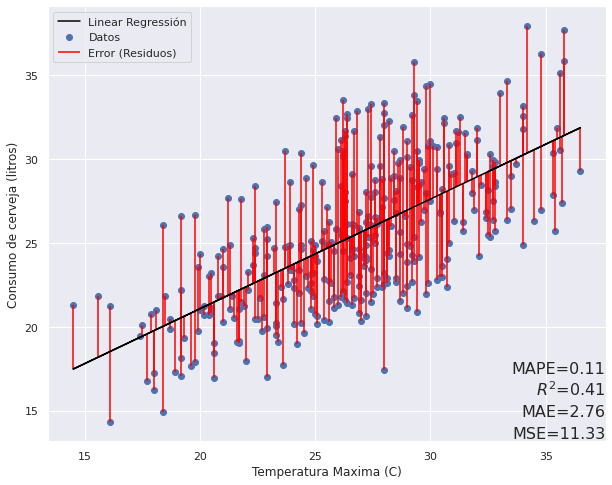

In [ ]:
y = cerveza_df['Consumo de cerveja (litros)'].values
x = cerveza_df['Temperatura Maxima (C)'].values
beta_1, beta_0 = rl_coef(x, y)
print(type(y))

fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(x,lin_reg_coef(x, beta_1,beta_0), color="black", label="Linear Regressión") 
ax.scatter(x,y, label="Datos")

ax
ax.vlines(x, y, lin_reg_coef(x, beta_1,beta_0), color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto. 
plt.ylabel('Consumo de cerveja (litros)')
plt.xlabel('Temperatura Maxima (C)')

mse = mean_squared_error(y , lin_reg_coef(x, beta_1,beta_0)) 
mae = mean_absolute_error(y , lin_reg_coef(x, beta_1,beta_0)) 
r2= r2_score(y , lin_reg_coef(x, beta_1,beta_0))
mape = mean_absolute_percentage_error(y , lin_reg_coef(x, beta_1,beta_0)) 

plt.annotate(s = f'MSE={np.round(mse,2)}', xy = (1,1), 
             xytext = (1,0), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)
plt.annotate(s = f'MAE={np.round(mae,2)}', xy = (1,1), 
             xytext = (1,0.05), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)
plt.annotate(s = f'$R^2$={np.round(r2,2)}', xy = (1,1), 
             xytext = (1,0.1), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)
plt.annotate(s = f'MAPE={np.round(mape,2)}', xy = (1,1), 
             xytext = (1,0.15), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)

plt.legend()
plt.show()

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Regresión lineal con múltiples variables independientes**</font>


Utilizando el mismo dataset obtenido de la dinámica 2, vamos a ajustar una regresión lineal múltiple. Esto quiere decir, que, en vez de ajustar un solo parámetro en nuestra regresión para tratar de explicar la variable dependiente, utilizaremos dos o más variables dependientes. En este caso, nuestra regresión tomara una nueva forma:


$$Y =  \beta_0 +X_1\beta_1+X_2\beta_2+\dots+X_m\beta_m$$

En este caso vamos a tener $m+1$ parámetros, donde $m$ corresponde a la cantidad de variables dependientes que utilizaremos. La razón de que sean $m+1$ variables, es porque tenemos que considerar el intercepto $\hat{\beta_0}$.

La ecuación anterior, podemos representarlas en forma matricial:

$$ Y = X^T\beta$$ 

donde:

$$Y = \begin{bmatrix}Y_1 \\ Y_2  \\ \vdots \\ Y_m\end{bmatrix} \quad \beta = \begin{bmatrix}\beta_1 \\ \beta_2  \\ \vdots \\ \beta_m\end{bmatrix}  \quad X = \begin{bmatrix}X_{11} & X_{12} & \cdots & X_{1m}\\ X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \ddots & \vdots\\ X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix}$$

El encontrar la matriz de los parámetros estimados $\hat{\beta}$ para generar nuestra predicción $\hat{Y}$ se lleva a cabo minimizando la suma de los errores para cada una de las variables presentes en nuestro set de datos. Esto nos genera una solución fácilmente programable en Numpy, de la forma:

$$\hat{\beta} = (X^TX)^{-1}X^TY $$

Para poder incorporar el intercepto ($\beta_0$), tenemos que hacer una pequeña modificación a la matriz $X$, y esta corresponde a agregar una columna de largo $n$, con la constante $1$. Esto se hace para poder modelar el intercepto en la última ecuación presentada:

$$X = \begin{bmatrix}X_{11} & X_{12} & \cdots & X_{1m}\\ X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \ddots & \vdots\\ X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix} \rightarrow X' = \begin{bmatrix} 1& X_{11} & X_{12} & \cdots & X_{1m}\\ 1 & X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \vdots & \ddots & \vdots\\ 1 &X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix}$$


In [ ]:
import pandas as pd
# Cargamos los datos desde Drive
cerveza_df = pd.read_csv(path+"/Consumo_cerveja.csv")
# o carga en local
#cerveza_df = pd.read_csv("../data/Consumo_cerveja.csv")

cerveza_df.head(10) # Mostramos los primeros 5

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900
5,2015-01-06,23.78,20.1,30.5,12.2,0,28.218
6,2015-01-07,24.00,19.5,33.7,0.0,0,29.732
7,2015-01-08,24.90,19.5,32.8,48.6,0,28.397
8,2015-01-09,28.20,21.9,34.0,4.4,0,24.886
9,2015-01-10,26.76,22.1,34.2,0.0,1,37.937


In [ ]:
#Extraemos nuestras primeras 5 variables independientes
X1 = cerveza_df['Temperatura Media (C)']
X2 = cerveza_df['Temperatura Minima (C)']
X3 = cerveza_df['Temperatura Maxima (C)']
X4 = cerveza_df['Precipitacao (mm)']
X5 = cerveza_df['Final de Semana']

# Extraemos la variable dependiente
y = cerveza_df['Consumo de cerveja (litros)']


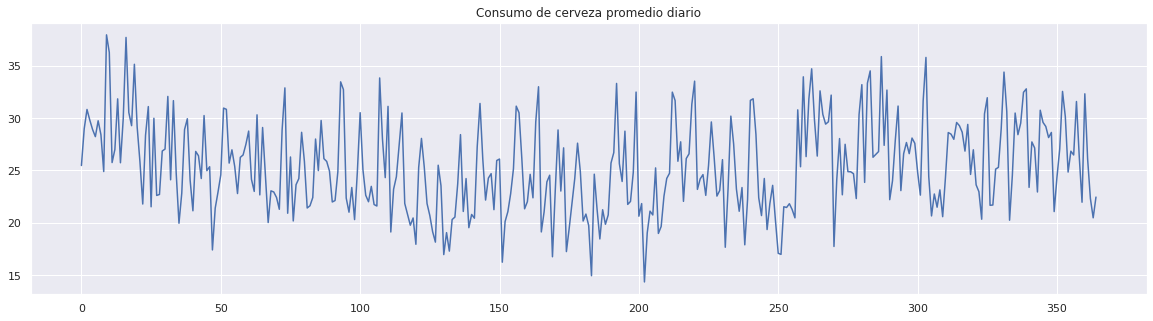

In [ ]:
# Vamos a graficar nuestra variable y a traves del tiempo: 
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y)),y)
plt.title("Consumo de cerveza promedio diario")
plt.show()

Acá generaremos una grilla de matplotlib, la cual  nos permitirá generar subgráficos que ocupen más de una fila/columna.

[Documentación Gridspec](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html)

En este caso, vamos a hacer varios diagramas de dispersión, para ver la relación existente entre nuestras variables independientes, con la variable dependiente.


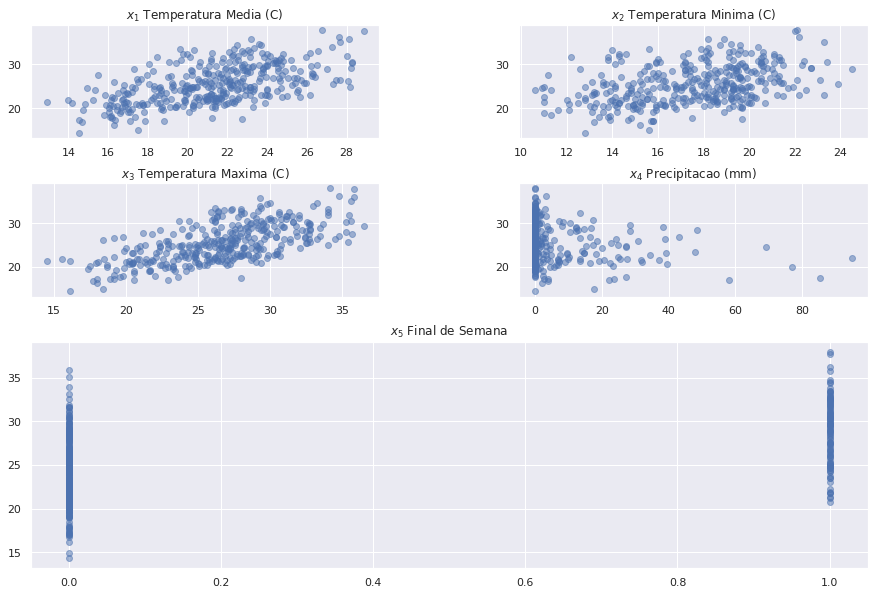

In [ ]:
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3, height_ratios=[1, 1, 2])

plt.figure(figsize=(15,10))
ax = plt.subplot(grid[0,0]) #Ocupar la primera fila, primera columna
ax.scatter(X1, y, alpha=0.5)
ax.set_title("$x_1$ Temperatura Media (C)")

ax = plt.subplot(grid[0,1])#Ocupar la primera fila, segunda columna
ax.scatter(X2, y, alpha=0.5)
ax.set_title("$x_2$ Temperatura Minima (C)")

ax = plt.subplot(grid[1,0]) #Ocupar la segunda fila, primera columna
ax.scatter(X3, y, alpha=0.5)
ax.set_title("$x_3$ Temperatura Maxima (C)")

ax = plt.subplot(grid[1,1])#Ocupar la segunda fila, segunda columna
ax.scatter(X4, y, alpha=0.5)
ax.set_title("$x_4$ Precipitacao (mm)")

ax = plt.subplot(grid[2,:])#Ocupar la tercera fila y ambas columnas
ax.scatter(X5, y, alpha=0.5)
ax.set_title("$x_5$ Final de Semana")


plt.show()

Podemos ver que el consumo de cerveza al parecer tiene una correlación positiva con las temperaturas. Generemos nuestra matriz X previo al proceso de obtención de los betas:

In [ ]:
X = np.zeros((len(X1),6)) #Generamos una matriz de Nx6, uno para cada una de nuestros variables independientes, e incluyendo la columna para el intercepto: 
X.shape

(365, 6)

In [ ]:
# Llenamos la matriz, con cada una de los valores correspondientes, en este caso, el intercepto ira en la primera columna
# y para el resto de las columnas las extraeremos utilizando los valores de una serie de pandas (.value)
X[:,0] = 1
X[:,1] = X1.values
X[:,2] = X2.values
X[:,3] = X3.values
X[:,4] = X4.values
X[:,5] = X5.values


In [ ]:
X[:5] #Ahora imprimimos las primeras 5 filas

array([[ 1.  , 27.3 , 23.9 , 32.5 ,  0.  ,  0.  ],
       [ 1.  , 27.02, 24.5 , 33.5 ,  0.  ,  0.  ],
       [ 1.  , 24.82, 22.4 , 29.9 ,  0.  ,  1.  ],
       [ 1.  , 23.98, 21.5 , 28.6 ,  1.2 ,  1.  ],
       [ 1.  , 23.82, 21.  , 28.3 ,  0.  ,  0.  ]])

Para transponer una matriz de Numpy, es tan sencillo como llamar a `matriz.T` para realizar esta operación. En el caso de la multiplicación matricial, necesitamos utilizar el método `np.dot` (Recordar que existen la restricción de que el número de columnas de la primera matriz, tiene que ser igual al número de filas de la segunda matriz). Finalmente, para invertir una matriz, tenemos que utilizar el método `np.lingal.inv` y aplicarlo en una matriz.

$$ \hat{\beta} = (X^TX)^{-1}X^TY $$

In [ ]:
XTX = np.dot(X.T,X) # Calculamos X traspuesto multiplicado por X
XTY = np.dot(X.T,y) # Calculamos X traspuesto por Y
betas = np.dot(np.linalg.inv(XTX),XTY) #Calculamos XTX^-1 por XTY, el resultado va a ser nuestro vector de betas de largo m + 1

# Extraemos los betas
beta_0 = betas[0]
beta_1 = betas[1]
beta_2 = betas[2]
beta_3 = betas[3]
beta_4 = betas[4]
beta_5 = betas[5]

betas #Imprimimos los valores de nuestros parametros ajustados

array([ 6.44469636,  0.03079559, -0.01903491,  0.65600076, -0.05746938,
        5.18318073])

In [ ]:
#Finalmente, definimos nuestra función  para la regresión lineal, que reciba por parametros los arreglos para cada variable
# y que internamente, calcule la variable Y con los nuevos betas

def lin_reg2(x1, x2, x3, x4, x5):
    y_hat = (beta_1 * x1) + (beta_2 * x2) + (beta_3 * x3) + (beta_4 * x4) + (beta_5 * x5) + beta_0
    return y_hat

Graficamos la señal original, en comparación con lo que obtenemos de nuestra regresión lineal múltiple

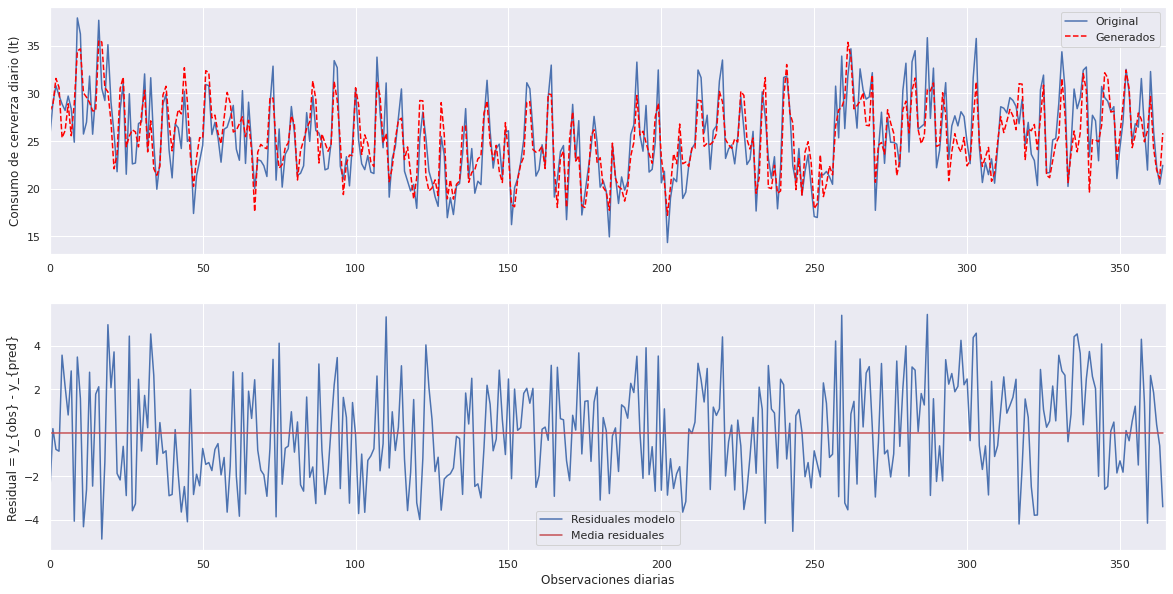

In [ ]:
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.subplot(211)
plt.plot(np.arange(len(y)), y, label="Original")
plt.plot(np.arange(len(y)), lin_reg2(X1, X2, X3, X4, X5),'--', color="red", label="Generados")
plt.xlim([0, len(y)])
plt.ylabel('Consumo de cerverza diario (lt)')
plt.legend()

#calculo de error o residual
e = y - lin_reg2(X1, X2, X3, X4, X5)
plt.subplot(212)
plt.plot(np.arange(len(y)), e,'-', color="b", label="Residuales modelo")
plt.plot(np.arange(len(y)), np.mean(e)*np.ones(len(y)),'-', color="r", label="Media residuales")
plt.xlim([0, len(y)])
plt.ylabel('Residual = y_{obs} - y_{pred}')
plt.xlabel('Observaciones diarias')
plt.legend()

plt.show()

Y a su vez, podemos calcular nuestras métricas de bondad de ajuste, y errores asociados:

In [ ]:
SST = np.sum((y - np.mean(y))**2)
SSE = np.sum((y - lin_reg2(X1,X2,X3,X4,X5))**2)

R2 = 1 - (SSE/SST) 

print(f'\nR2 Score = {R2:6.2f}')


R2 Score =   0.72


In [ ]:
mse = np.sum((y - lin_reg2(X1,X2,X3,X4,X5))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg2(X1,X2,X3,X4,X5))) / len(y)
mape = np.sum(np.abs((y - lin_reg2(X1,X2,X3,X4,X5))/y)) / len(y)

In [ ]:
print(f'\nMSE = {mse:6.2f}\nMAE = {mae:6.2f}\nMAPE = {mape:5.2f}')


MSE =   5.35
MAE =   1.96
MAPE =  0.08


de lo obtenido, podemos ver que utilizando una regresión lineal múltiple, nuestro $R^2$ aumenta, y los errores disminuyen al compararse con el mejor de las regresiones simples realizadas en la dinámica 2.

Para ir finalizando, existen múltiples librerías que ya tienen implementado las regresiones lineales, vamos a ver la implementación existente en `scikit-learn`

[Documentación LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


In [ ]:
# En este caso, de scikit-learn, de los modelos lineales, importamos la regresión lineal
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() # Y generamos un obtejo de LinearRegressión

In [ ]:
# Obtenemos nuestra matriz X
# Eliminamos las columnas 0 y 6 (fecha y consumo)
X = cerveza_df.iloc[:,1:6] 
X.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
0,27.30,23.9,32.5,0.0,0
1,27.02,24.5,33.5,0.0,0
2,24.82,22.4,29.9,0.0,1
3,23.98,21.5,28.6,1.2,1
4,23.82,21.0,28.3,0.0,0


Una de las ventajas de scikit-learn, es que para la regresión lineal automáticamente añade el intercepto a calcular, sin que nosotros tengamos que modificar nuestra matriz $X$. Para poder ajustar nuestro modelo, necesitamos utilizar el método `lr.fit(X,y)`:

In [ ]:
lr.fit(X, y.values)

LinearRegression()

In [ ]:
y_hat = lr.predict(X)
y_hat

array([28.1505061 , 28.78646314, 31.58026417, 30.64976306, 25.34333552,
       26.10131034, 28.91983519, 25.56413861, 28.94742782, 34.46652135,
       34.68930662, 30.0592295 , 29.60991046, 29.05078092, 28.17623633,
       28.17258688, 35.58269679, 35.4063704 , 30.61304626, 30.17275009,
       27.06277152, 22.08879106, 23.65521963, 30.51752805, 31.71478024,
       24.40661628, 25.53951499, 26.18574798, 25.96055754, 24.39542645,
       27.87147225, 30.34780049, 23.86836633, 27.12496629, 22.11041592,
       21.40625285, 22.35750912, 29.83924772, 30.75762844, 26.9556399 ,
       23.97223296, 26.663484  , 28.30802059, 27.86055444, 32.70481306,
       29.05805146, 23.35629042, 20.23649914, 23.29850984, 25.36062712,
       25.29212703, 32.39820232, 32.19703236, 27.43130537, 27.72923759,
       25.86809984, 24.72127593, 27.37912957, 30.11393145, 29.01656765,
       25.9549482 , 26.13876371, 26.82219913, 27.55136076, 25.46742092,
       27.18792885, 23.96608865, 17.58717762, 23.84211757, 24.65

Con esto, ya tenemos ajustado el modelo de regresión lineal, y solo queda extraer los betas. Para esto, tenemos que acceder a los parámetros `lr.intercept` (para $\hat{\beta_0}$) y `lr.coef_` para el resto de los betas.

In [ ]:
lr.intercept_, lr.coef_

(6.44469636057201,
 array([ 0.03079559, -0.01903491,  0.65600076, -0.05746938,  5.18318073]))

Haciendo la comparación con nuestros betas, vemos que son iguales.

In [ ]:
betas

array([ 6.44469636,  0.03079559, -0.01903491,  0.65600076, -0.05746938,
        5.18318073])

In [ ]:
import statsmodels.api as sm
# https://www.statsmodels.org/stable/index.html
X['const'] = 1
model = sm.OLS(y.values, X)
res   = model.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.19e-97
Time:                        23:58:18   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Temperatura Media (C)      0

In [ ]:
res.aic

1660.149751621722

## <font color='green'>**Actividad 3**</font>
### Regresión lineal múltiple, para predecir el precio de una casa. 

En este caso, trabajaremos con un set de datos de precios de casas del condado de King, Georgia, USA. El set de datos contiene 21 variables, pero no todas van a servir para el proceso de la regresión. Su tarea va a ser seleccionar las variables que va a descartar, y trabajar con el resto de las variables restantes para generar una regresión lineal múltiple utilizando Numpy para obtener los $\hat{\beta}$. Además de esto, calcule el $R^2$ y obtenga las métricas de error $MSE$, $MAE$ y $MAPE$. 

**Desafío:** Puede que el uso de todas las variables no genere el mejor modelo. Por lo mismo, el **desafío** consiste en implementar el algoritmo de __Step Forward Feature Selection__. La idea de este algoritmo es agregar de a 1 en 1 las variables existentes en nuestro set de datos y ver como mejora el proceso de ajuste de la regresión lineal.

1. De las posibles variables consideradas en un principio (la cual llamaremos $m$), entrene $m$ modelos de regresión lineal (uno por cada variable), y seleccione la variable que obtenga un mejor $MAE$. 

2. Con la variable seleccionada, remuévala del conjunto de posibles variables y guárdela en una lista de variables seleccionadas (`selected_vars`)

3. Del conjunto de posibles variables restantes, entrene $m-len(selected\_vars)$ modelos de regresión lineal utilizando las variables restantes en conjunto con `selected_vars`. Seleccione la nueva variable que obtenga un mejor $MAE$. Repita el paso 2. hasta que no quede ninguna variable.

4. Finalmente, con el procedimiento realizado, y ninguna variable restante en el conjunto de posible variable, imprima por pantalla el mejor conjunto de variables junto con su $MAE$. Adicionalmente, puede graficar la curva de cómo va evolucionando el $MAE$ a medida que va agregando variables.

**Nota:** Para el desafío, es recomendable utilizar `LinearRegression` de `scikit-learn` por temas de facilidad de implementación del algoritmo de __Step Forward Feature Selection__. Para poder obtener el $\hat{Y}$ utilizando `LinearRegression`, se debe utilizar el método `.predict(X)` posteriormente a haber ajustado el modelo (`.fit(X,y)`), y este computara: 

$$\hat{Y}=\hat{\beta_0}+X_1\hat{\beta_1}+X_2\hat{\beta_2}+\dots+X_m\hat{\beta_m}$$ 

Ejemplo de uso:

```python
lr = LinearRegression()
lr.fit(X,y)
y_hat = lr.predict(X)
```

In [ ]:
# Drive
#housing_df = pd.read_csv("/content/drive/MyDrive/Cursos/Estadistica/EstadisticaDescriptiva/data/kc_house_data.csv")
# Local
housing_df = pd.read_csv(path+"/kc_house_data.csv")

housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Su codigo aca ...
# seleccionar las variables que va a descartar, y trabajar con el resto de las variables restantes para generar una regresión lineal 
# múltiple utilizando Numpy para obtener los  β^ . Además de esto, calcule el  R2  y obtenga las métricas de error  MSE ,  MAE  y  MAPE

# Variables a verificar
X3 = housing_df['bedrooms'].values
X4 = housing_df['bathrooms'].values
X5 = housing_df['sqft_living'].values
X6 = housing_df['sqft_lot'].values
X7 = housing_df['floors'].values
X8 = housing_df['waterfront'].values
X9 = housing_df['view'].values
X10 = housing_df['condition'].values
X11 = housing_df['grade'].values
X12 = housing_df['sqft_above'].values
X13 = housing_df['sqft_basement'].values
X14 = housing_df['yr_built'].values
X15 = housing_df['yr_renovated'].values
X16 = housing_df['zipcode'].values
X17 = housing_df['lat'].values
X18 = housing_df['long'].values
X19 = housing_df['sqft_living15'].values
X20 = housing_df['sqft_lot15'].values

# Extraemos la variable dependiente
y = housing_df['price'].values

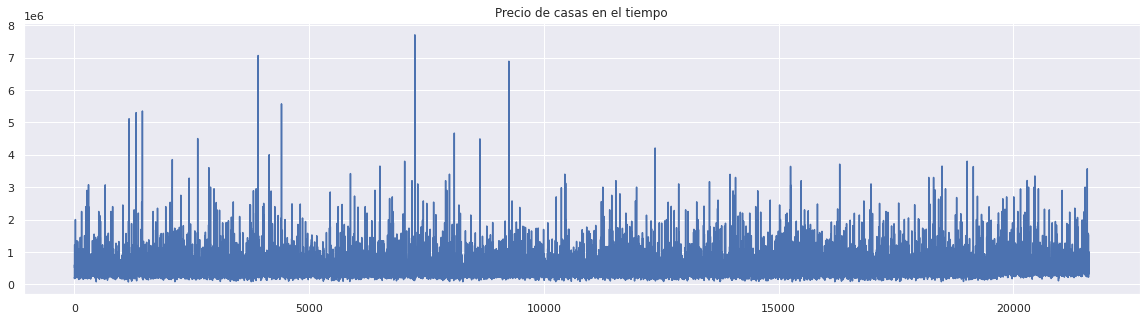

In [ ]:
# Gráfica de precio en el tiempo

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y)),y)
plt.title("Precio de casas en el tiempo")
plt.show()

In [ ]:
# De las posibles variables consideradas en un principio (la cual llamaremos  m ), entrene  m  modelos de regresión lineal (uno por cada variable),
# Seleccione la que tiene un mejor MAE

beta_1, beta_0 = rl_coef(X3, y)
mae3 = mean_absolute_error(y , lin_reg_coef(X3, beta_1,beta_0)) 
print(f'El MAE de X3 es {mae3}')

beta_1, beta_0 = rl_coef(X4, y)
mae4 = mean_absolute_error(y , lin_reg_coef(X4, beta_1,beta_0)) 
print(f'El MAE de X4 es {mae4}')

beta_1, beta_0 = rl_coef(X5, y)
mae5 = mean_absolute_error(y , lin_reg_coef(X5, beta_1,beta_0)) 
print(f'El MAE de X5 es {mae5}')

beta_1, beta_0 = rl_coef(X6, y)
mae6 = mean_absolute_error(y , lin_reg_coef(X6, beta_1,beta_0)) 
print(f'El MAE de X6 es {mae6}')

beta_1, beta_0 = rl_coef(X7, y)
mae7 = mean_absolute_error(y , lin_reg_coef(X7, beta_1,beta_0)) 
print(f'El MAE de X7 es {mae7}')

beta_1, beta_0 = rl_coef(X8, y)
mae8 = mean_absolute_error(y , lin_reg_coef(X8, beta_1,beta_0)) 
print(f'El MAE de X8 es {mae8}')

beta_1, beta_0 = rl_coef(X9, y)
mae9 = mean_absolute_error(y , lin_reg_coef(X9, beta_1,beta_0)) 
print(f'El MAE de X9 es {mae9}')

beta_1, beta_0 = rl_coef(X10, y)
mae10 = mean_absolute_error(y , lin_reg_coef(X10, beta_1,beta_0)) 
print(f'El MAE de X10 es {mae10}')

beta_1, beta_0 = rl_coef(X11, y)
mae11 = mean_absolute_error(y , lin_reg_coef(X11, beta_1,beta_0)) 
print(f'El MAE de X11 es {mae11}')

beta_1, beta_0 = rl_coef(X12, y)
mae12 = mean_absolute_error(y , lin_reg_coef(X12, beta_1,beta_0)) 
print(f'El MAE de X12 es {mae12}')

beta_1, beta_0 = rl_coef(X13, y)
mae13 = mean_absolute_error(y , lin_reg_coef(X13, beta_1,beta_0)) 
print(f'El MAE de X13 es {mae13}')

beta_1, beta_0 = rl_coef(X14, y)
mae14 = mean_absolute_error(y , lin_reg_coef(X14, beta_1,beta_0)) 
print(f'El MAE de X14 es {mae14}')

beta_1, beta_0 = rl_coef(X15, y)
mae15 = mean_absolute_error(y , lin_reg_coef(X15, beta_1,beta_0)) 
print(f'El MAE de X15 es {mae15}')

beta_1, beta_0 = rl_coef(X16, y)
mae16 = mean_absolute_error(y , lin_reg_coef(X16, beta_1,beta_0)) 
print(f'El MAE de X16 es {mae16}')

beta_1, beta_0 = rl_coef(X17, y)
mae17 = mean_absolute_error(y , lin_reg_coef(X17, beta_1,beta_0)) 
print(f'El MAE de X17 es {mae17}')

beta_1, beta_0 = rl_coef(X18, y)
mae18 = mean_absolute_error(y , lin_reg_coef(X18, beta_1,beta_0)) 
print(f'El MAE de X18 es {mae18}')

beta_1, beta_0 = rl_coef(X19, y)
mae19 = mean_absolute_error(y , lin_reg_coef(X19, beta_1,beta_0)) 
print(f'El MAE de X19 es {mae19}')

beta_1, beta_0 = rl_coef(X20, y)
mae20 = mean_absolute_error(y , lin_reg_coef(X20, beta_1,beta_0)) 
print(f'El MAE de X20 es {mae20}')


El MAE de X3 es 220663.01493307095
El MAE de X4 es 203653.3577587479
El MAE de X5 es 173688.2733595311
El MAE de X6 es 232645.57564700113
El MAE de X7 es 223961.6835090767
El MAE de X8 es 229555.66333324494
El MAE de X9 es 218587.7506378326
El MAE de X10 es 233554.61061880903
El MAE de X11 es 175179.0251031181
El MAE de X12 es 191857.48707372468
El MAE de X13 es 224476.48387374784
El MAE de X14 es 234021.44811028393
El MAE de X15 es 232163.02947976167
El MAE de 16 es 233746.2313143321
El MAE de X17 es 212217.32588394903
El MAE de X18 es 233635.3439253968
El MAE de X19 es 186637.0740947006
El MAE de X20 es 232996.448291433


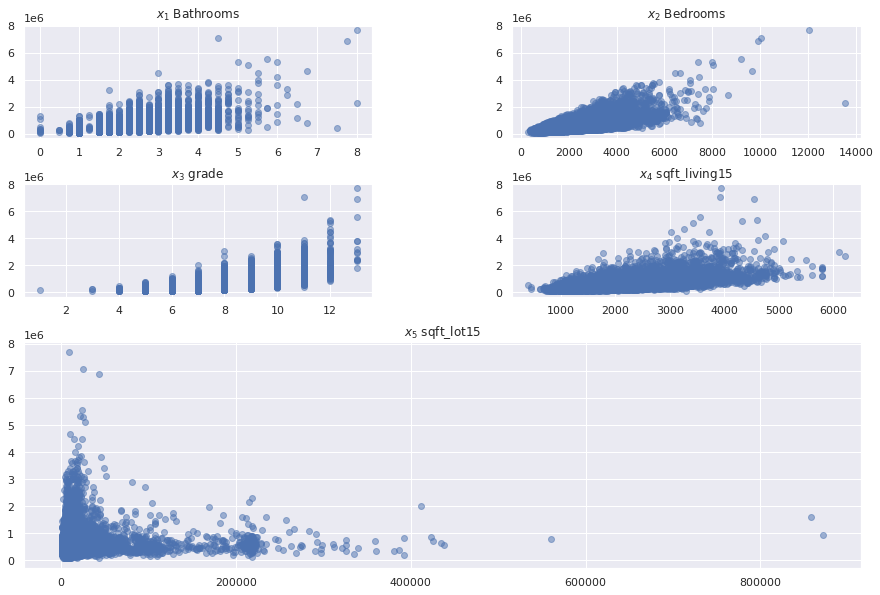

In [ ]:


# Gráfica de las variables seleccionadas
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3, height_ratios=[1, 1, 2])

plt.figure(figsize=(15,10))
ax = plt.subplot(grid[0,0]) #Ocupar la primera fila, primera columna
ax.scatter(X4, y, alpha=0.5)
ax.set_title("$x_1$ Bathrooms")

ax = plt.subplot(grid[0,1])#Ocupar la primera fila, segunda columna
ax.scatter(X5, y, alpha=0.5)
ax.set_title("$x_2$ Bedrooms")

ax = plt.subplot(grid[1,0]) #Ocupar la segunda fila, primera columna
ax.scatter(X11, y, alpha=0.5)
ax.set_title("$x_3$ grade")

ax = plt.subplot(grid[1,1])#Ocupar la segunda fila, segunda columna
ax.scatter(X19, y, alpha=0.5)
ax.set_title("$x_4$ sqft_living15")

ax = plt.subplot(grid[2,:])#Ocupar la tercera fila y ambas columnas
ax.scatter(X20, y, alpha=0.5)
ax.set_title("$x_5$ sqft_lot15")


plt.show()



In [ ]:
# Generar una regresión lineal múltiple utilizando Numpy para obtener los  β^ . 

#Generamos una matriz de Nx6, uno para cada una de nuestros variables independientes, e incluyendo la columna para el intercepto: 
X = np.zeros((len(X4),6)) 
X.shape

# Llenamos la matriz, con cada una de los valores correspondientes, en este caso, el intercepto ira en la primera columna

X[:,0] = 1
X[:,1] = X4
X[:,2] = X5
X[:,3] = X11
X[:,4] = X19
X[:,5] = X20

XTX = np.dot(X.T,X) # Calculamos X traspuesto multiplicado por X
XTY = np.dot(X.T,y) # Calculamos X traspuesto por Y
betas = np.dot(np.linalg.inv(XTX),XTY) #Calculamos XTX^-1 por XTY, el resultado va a ser nuestro vector de betas de largo m + 1

# Extraemos los betas
beta_0 = betas[0]
beta_1 = betas[1]
beta_2 = betas[2]
beta_3 = betas[3]
beta_4 = betas[4]
beta_5 = betas[5]

betas #Imprimimos los valores de nuestros parametros ajustados

array([-5.88763703e+05, -3.95690200e+04,  2.02278143e+02,  1.00423329e+05,
        1.55577668e+01, -6.28310330e-01])

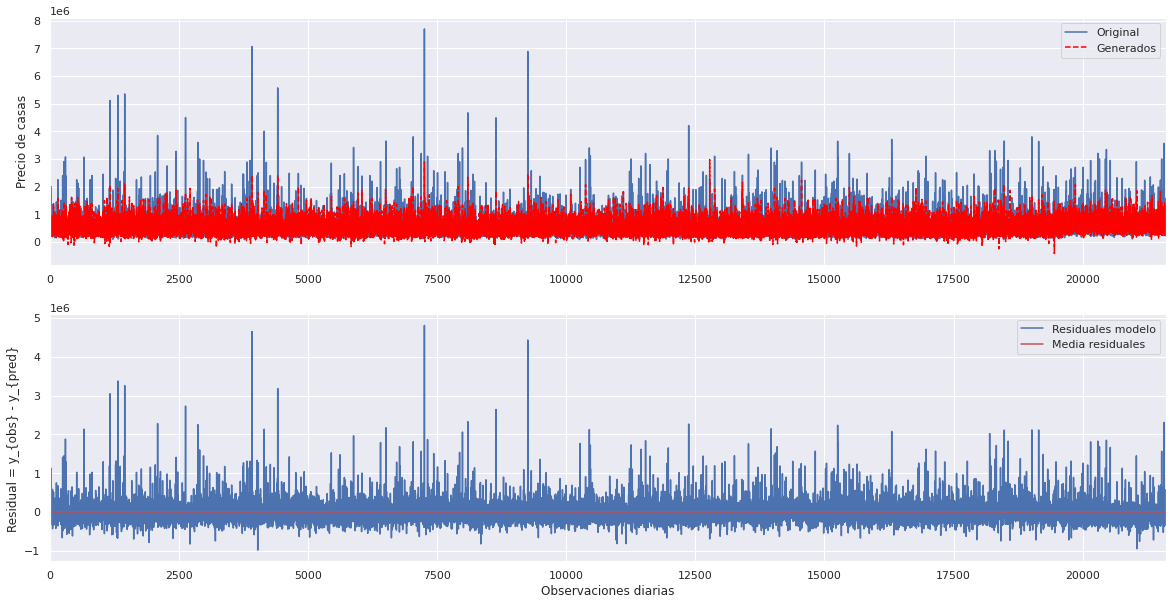

In [ ]:
# En línea 51 definimos regresión lineal múltiple

# Ahora graficamos real vs ajustado
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.subplot(211)
plt.plot(np.arange(len(y)), y, label="Original")
plt.plot(np.arange(len(y)), lin_reg2(X4, X5, X11, X19, X20),'--', color="red", label="Generados")
plt.xlim([0, len(y)])
plt.ylabel('Precio de casas')
plt.legend()

#calculo de error o residual
e = y - lin_reg2(X4, X5, X11, X19, X20)
plt.subplot(212)
plt.plot(np.arange(len(y)), e,'-', color="b", label="Residuales modelo")
plt.plot(np.arange(len(y)), np.mean(e)*np.ones(len(y)),'-', color="r", label="Media residuales")
plt.xlim([0, len(y)])
plt.ylabel('Residual = y_{obs} - y_{pred}')
plt.xlabel('Observaciones diarias')
plt.legend()

plt.show()

In [ ]:
# Además de esto, calcule el  R2  y obtenga las métricas de error  MSE ,  MAE  y  MAPE .

SST = np.sum((y - np.mean(y))**2)
SSE = np.sum((y - lin_reg2(X4, X5, X11, X19, X20))**2)

R2 = 1 - (SSE/SST) 

print(f'\nR2 Score = {R2:6.2f}')

mse = np.sum((y - lin_reg2(X4, X5, X11, X19, X20))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg2(X4, X5, X11, X19, X20))) / len(y)
mape = np.sum(np.abs((y - lin_reg2(X4, X5, X11, X19, X20))/y)) / len(y)

print(f'\nMSE = {mse:6.2f}\nMAE = {mae:6.2f}\nMAPE = {mape:5.2f}')


R2 Score =   0.54

MSE = 62075504815.68
MAE = 163265.68
MAPE =  0.34


<font color='green'>Fin actividad 3</font>